In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Data Examination

In [2]:
# Read the CSV file named and store its contents in df
df = pd.read_csv('Tweet Text.csv')

In [3]:
# Display the first few rows of the df
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Show the number of rows and columns of the df
df.shape

(7613, 5)

In [5]:
# Count and sum the number of null values in each column of the df
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Count the number of unique values in the 'target' column of the df
df['target'].nunique()

2

In [7]:
# Retrieve an array of unique values in the 'target' column of the df
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
# Count the number of unique values in the 'keyword' column of the df
df['keyword'].nunique()

221

In [9]:
# Retrieve an array of unique values in the 'target' column of the df
df['location'].nunique()

3341

## Data Cleaning

In [10]:
# Cleaning data from url, hastag, symbol
def clean_text(df,text):
    df['text_clean'] = df[text].apply(lambda x: re.sub(r"http\S+", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"http", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"@\S+", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", ' ',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"@", "at",x))
    df['text_clean'] = df['text_clean'].str.replace('#','')
    df['text_clean'] = df['text_clean'].str.lower()                                         

In [11]:
# Apply clean_text funtion 
clean_text(df,'text')

In [12]:
df

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,the out of control wild fires in california ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m1 94 01 04 utc ?5km s of volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an e bike collided ...


In [13]:
#pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afiq_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
# Tokenization - Split sentence into token
df['text_clean'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [16]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


In [17]:
# List abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [18]:
# Create function for replacing abbreviations
def replace_abr(text,abb):
    return [abb.get(w, w) for w in text]

In [19]:
# Apply replace_abr function
df['text_clean'] = df['text_clean'].apply(lambda x:replace_abr(x, abbreviations))

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afiq_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Remove stop words
df['text_clean'] = df['text_clean'].apply(lambda x: [i for i in x if i not in stopwords.words('english')])

In [22]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, 'shelter, place, ', notifie..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [23]:
nltk.download('wordnet') # lexical database
nltk.download('omw-1.4') # Open Multingual Wordnet > provide access to wordnet in various language
nltk.download('averaged_perceptron_tagger') # part of speech tagging

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\afiq_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\afiq_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\afiq_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
# create a function to extract part of speech (POS)
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() # extract only first letter of pos (result exp >>[('asked', 'VBN')]<< we only take the V as verb)
    tag_dict = {'V':wordnet.VERB,
               'N':wordnet.NOUN,
               'J':wordnet.ADJ,
               'R':wordnet.ADV}
    return tag_dict.get(tag,wordnet.NOUN)

In [27]:
# lemmatization - Convert the words into its base form/lemma/directionary form
df['text_clean'] = df['text_clean'].apply(lambda x:[lemmatizer.lemmatize(i, get_pos(i)) for i in x])

In [28]:
df[df['target'] == 0]

,id,keyword,location,text,target,text_clean
15,23,NaN,NaN,What's up man?,0,"['s, man, ?]"
16,24,NaN,NaN,I love fruits,0,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,"[goooooooaaaaaal, !, !, !, !, !, !]"
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,"[great, atmosphere, british, lion, gig, tonigh..."
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,"[cramer, iger, 's, 3, word, wreck, disney, 's,..."
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,"[box, ready, explode, !, explode, kitten, fina..."
7587,10841,NaN,NaN,Sirens everywhere!,0,"[siren, everywhere, !]"


In [29]:
# Clean symbol
df['text_clean'] = [re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(x)).split() for x in df['text_clean']]

In [30]:
df[df['target'] == 0]

,id,keyword,location,text,target,text_clean
15,23,NaN,NaN,What's up man?,0,"[s, man]"
16,24,NaN,NaN,I love fruits,0,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,[goooooooaaaaaal]
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,"[great, atmosphere, british, lion, gig, tonigh..."
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,"[cramer, iger, s, 3, word, wreck, disney, s, s..."
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,"[box, ready, explode, explode, kitten, finally..."
7587,10841,NaN,NaN,Sirens everywhere!,0,"[siren, everywhere]"


## EDA

In [31]:
#pip install wordcloud
from PIL import Image
from wordcloud import WordCloud

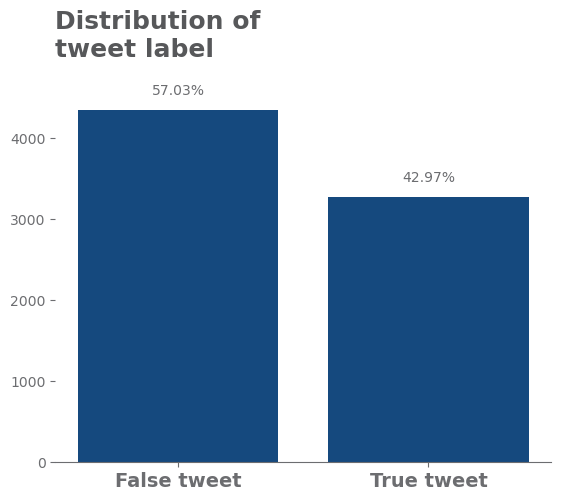

In [32]:
# Count the occurrences of each label in the 'target' column
temp = df['target'].value_counts()  
# Plot the bar chart
plt.bar(temp.index,temp, color='#15497e')
# Customize plot appearance
plt.title('Distribution of\ntweet label\n',color='#57585a',
          fontweight='bold', loc='left', fontsize=18)
plt.ylabel('')
plt.xticks([0,1],['False tweet', 'True tweet'],
           fontweight='bold',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')
# Display percentage labels on top of the bars
for i, v in enumerate(temp):
    pcg = round((v / len(df)) * 100, 2)
    plt.text(i, v + 150, f'{pcg}%', color='#6c6d70',
             ha='center', va='bottom')

In [33]:
# Create new column namely 'length' that store the character length of each text
df['length'] = df['text'].str.len()

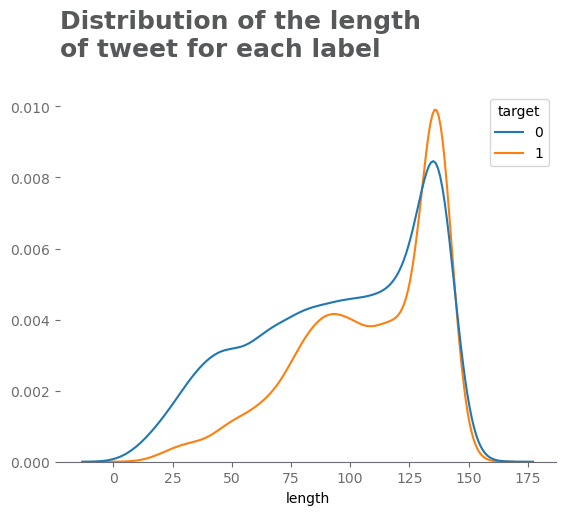

In [34]:
# Create a kernel density estimate plot
sns.kdeplot(data=df, x=df['length'], hue=df['target'])
# Customize plot appearance
plt.title('Distribution of the length\nof tweet for each label \n',
          color='#57585a',fontweight='bold', 
          loc='left', fontsize=18)
plt.ylabel('')
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

In [35]:
# Extract text data from DataFrame
wc_data_all = df['text_clean'].tolist()
wc_data_1 = df[df['target'] == 1]['text_clean'].tolist()
wc_data_0 = df[df['target'] == 0]['text_clean'].tolist()

In [36]:
# Combine the text data into single strings
wc_data_all = ' '.join([word for sublist in wc_data_all for word in sublist])
wc_data_1 = ' '.join([word for sublist in wc_data_1 for word in sublist])
wc_data_0 = ' '.join([word for sublist in wc_data_0 for word in sublist])

In [37]:
# Observe examples of disaster tweets
print("Examples of disaster tweets:")
print(wc_data_1.split()[:100])

Examples of disaster tweets:
['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect', '13000', 'people', 'receive', 'wildfire', 'evacuation', 'order', 'california', 'get', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfire', 'pours', 'school', 'rockyfire', 'update', 'california', 'hwy', '20', 'close', 'direction', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfire', 'flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flood', 'street', 'manitou', 'colorado', 'spring', 'area', 'm', 'top', 'hill', 'see', 'fire', 'wood', 's', 'emergency', 'evacuation', 'happen', 'building', 'across', 'street', 'm', 'afraid', 'tornado', 'come', 'area', 'three', 'people', 'die', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'get', 'flood', 'hah', 'wait', 'second', 'live', 'south']


In [38]:
# Observe examples of non-disaster tweets
print("Examples of non-disaster tweets:")
print(wc_data_0.split()[:100])

Examples of non-disaster tweets:
['s', 'man', 'love', 'fruit', 'summer', 'lovely', 'car', 'fast', 'goooooooaaaaaal', 'ridiculous', 'london', 'cool', 'love', 'skiing', 'wonderful', 'day', 'looooool', 'way', 'ca', 'nt', 'eat', 'shit', 'new', 'york', 'city', 'last', 'week', 'love', 'girlfriend', 'cooool', 'like', 'pasta', 'end', 'always', 'try', 'bring', 'heavy', 'metal', 'retweet', 'cry', 'set', 'ablaze', 'plus', 'side', 'look', 'sky', 'last', 'night', 'ablaze', 'mufc', 've', 'built', 'much', 'hype', 'around', 'new', 'acquisition', 'doubt', 'set', 'epl', 'ablaze', 'season', 'ablaze', 'lord', 'check', 'not', 'safe', 'for', 'work', 'outside', 're', 'ablaze', 'alive', 're', 'dead', 'inside', 'awesome', 'time', 'visit', 'cfc', 'head', 'office', 'ancop', 'site', 'ablaze', 'thanks', 'tita', 'vida', 'take', 'care', 'u', 'soooo', 'pumped', 'ablaze', 'want', 'set', 'chicago', 'ablaze', 'preach', 'hotel']


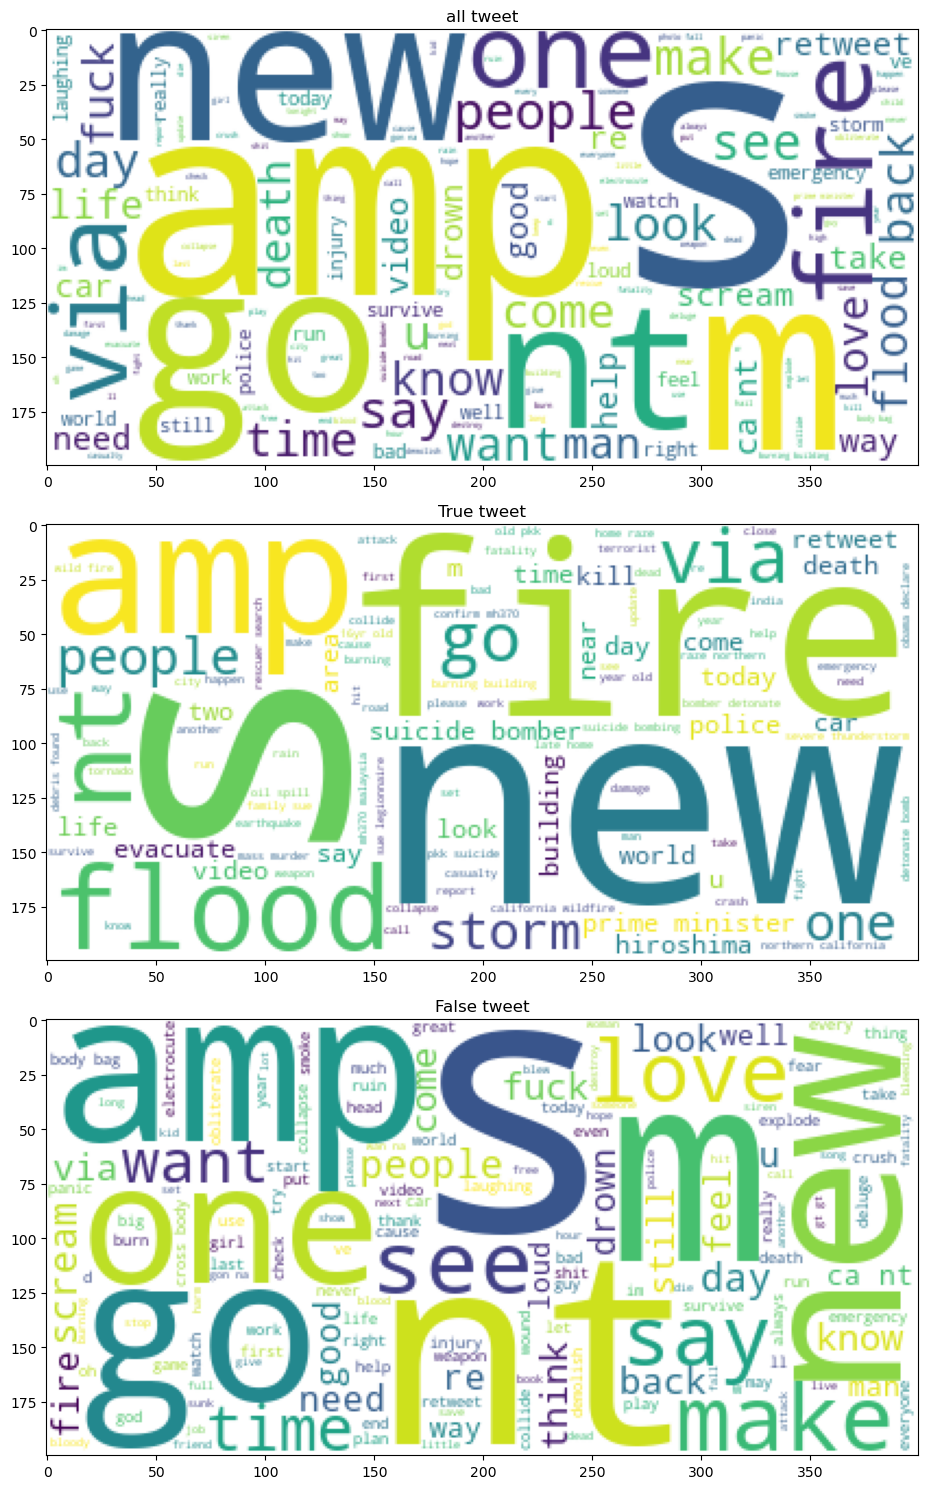

In [39]:
# Create a list of text data for word clouds
wc_list = [wc_data_all,wc_data_1,wc_data_0]
# Plot word clouds
title = ['all tweet', 'True tweet', 'False tweet']
plt.figure(figsize=(20, 15))  
for i,j in enumerate(wc_list):
    plt.subplot(3,1,i+1)    
    wc = WordCloud(background_color='white').generate(j)
    plt.imshow(wc)
    plt.title(title[i])

plt.tight_layout()
plt.show()

# Machine learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
# Text vectorization - Bag of Words
count_vectorizer = CountVectorizer()

In [42]:
# Split the dataset into train and test
X = [' '.join(doc) for doc in df['text_clean']]
y = df['target'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2023)

In [43]:
# Transform the data
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
# Model 1 Training - Random forest - Bag of WordS

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model1_1 = RandomForestClassifier(random_state=2023)

In [48]:
model1_1.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=2023)

In [49]:
y_pred1_1 = model1_1.predict(X_test_counts)

In [50]:
# Model 1 Evaluation - Random forest - Bag of WordS

In [51]:
acs1_1 = accuracy_score(y_test,y_pred1_1)

In [52]:
acs1_1

0.7984241628365069

In [53]:
cm1_1 = confusion_matrix(y_test,y_pred1_1)

In [54]:
labels = ['disaster', 'non-disaster']

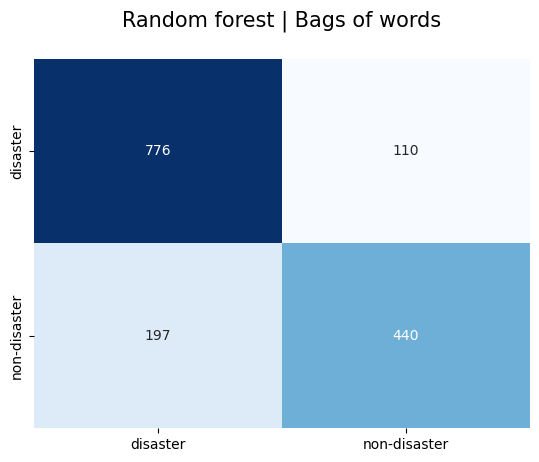

In [55]:
sns.heatmap(cm1_1, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Random forest | Bags of words\n', fontsize=15);

In [56]:
# Model 2 Training - Decision Tree - Bag of WordS

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model2_1 = DecisionTreeClassifier(random_state=2023)

In [59]:
model2_1.fit(X_train_counts,y_train)

DecisionTreeClassifier(random_state=2023)

In [60]:
y_pred2_1 = model2_1.predict(X_test_counts)

In [61]:
# Model 2 Evaluation - Decision Tree - Bag of WordS

In [62]:
acs2_1 = accuracy_score(y_test,y_pred2_1)

In [63]:
acs2_1

0.768220617202889

In [64]:
cm2_1 = confusion_matrix(y_test,y_pred2_1)

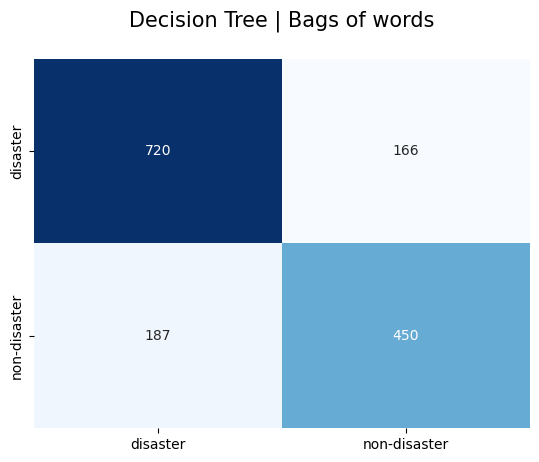

In [65]:
sns.heatmap(cm2_1, cmap='Blues', annot=True, fmt='d',xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Decision Tree | Bags of words\n', fontsize=15);

In [66]:
# Model 3 Training - Support Vector Machine - Bag of WordS

In [67]:
from sklearn.svm import SVC

In [68]:
model3_1 = SVC(random_state=2023)

In [69]:
model3_1.fit(X_train_counts,y_train)

SVC(random_state=2023)

In [70]:
pred3_1 = model3_1.predict(X_test_counts)

In [71]:
# Model 3 Evaluation - Support Vector Machine - Bag of WordS

In [72]:
acs3_1 = accuracy_score(y_test,pred3_1)

In [73]:
acs3_1

0.8154957321076822

In [74]:
cm3_1 = confusion_matrix(y_test,pred3_1)

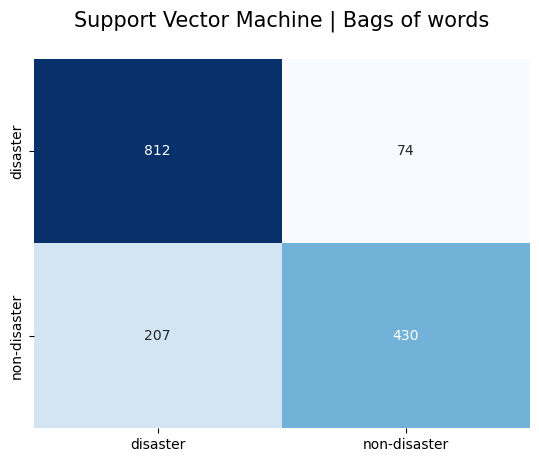

In [75]:
sns.heatmap(cm3_1, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Support Vector Machine | Bags of words\n', fontsize=15);

In [76]:
# Text vectorization - Term Frequency –Inverse Document Frequency (TF-IDF)
tfidf = TfidfVectorizer()

In [77]:
# Transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [78]:
# Model 1 Training - Random forest - TF-IDF

In [79]:
model1_2 = RandomForestClassifier(random_state=2023)

In [80]:
model1_2.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=2023)

In [81]:
y_pred1_2 = model1_2.predict(X_test_tfidf)

In [82]:
# Model 1 Evaluation - Random forest - TF-IDF

In [83]:
acs1_2 = accuracy_score(y_test,y_pred1_2)

In [84]:
acs1_2

0.8017071569271176

In [85]:
cm1_2 = confusion_matrix(y_test,y_pred1_2)

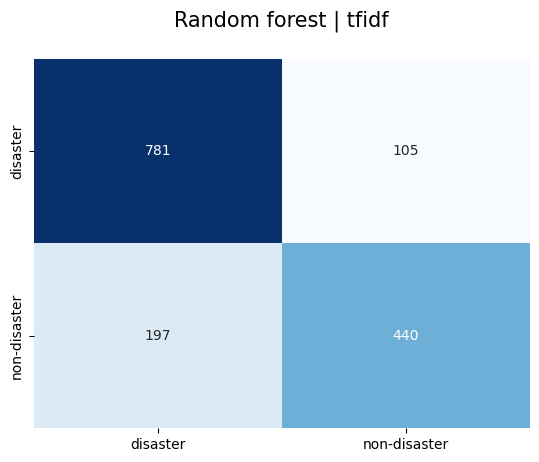

In [86]:
sns.heatmap(cm1_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Random forest | tfidf\n', fontsize=15);

In [87]:
# Model 2 Training - Decision Tree - TF-IDF

In [88]:
model2_2 = DecisionTreeClassifier(random_state=2023)

In [89]:
model2_2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(random_state=2023)

In [90]:
y_pred2_2 = model2_2.predict(X_test_tfidf)

In [91]:
# Model 2 Evaluation - Decision Tree - TF-IDF

In [92]:
acs2_2 = accuracy_score(y_test,y_pred2_2)

In [93]:
acs2_2

0.7504924491135916

In [94]:
cm2_2 = confusion_matrix(y_test,y_pred2_2)

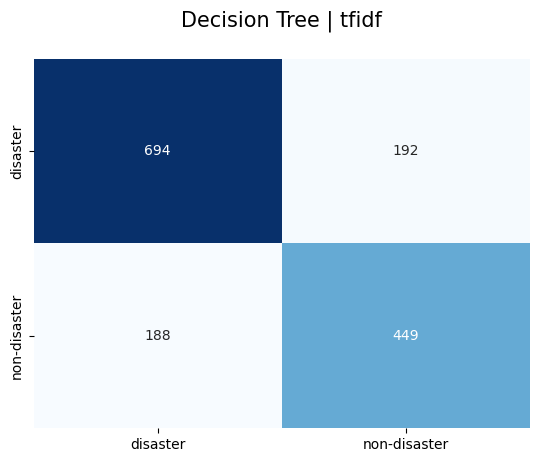

In [95]:
sns.heatmap(cm2_2, cmap='Blues', annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Decision Tree | tfidf\n', fontsize=15);

In [96]:
# Model 3 Training - Support Vector Machine - TF-IDF

In [97]:
model3_2 = SVC(random_state=2023)

In [98]:
model3_2.fit(X_train_tfidf,y_train)

SVC(random_state=2023)

In [99]:
pred3_2 = model3_2.predict(X_test_tfidf)

In [100]:
# Model 3 Evaluation - Support Vector Machine - TF-IDF

In [101]:
acs3_2 = accuracy_score(y_test,pred3_2)

In [102]:
acs3_2

0.8240315167432699

In [103]:
cm3_2 = confusion_matrix(y_test,pred3_2)

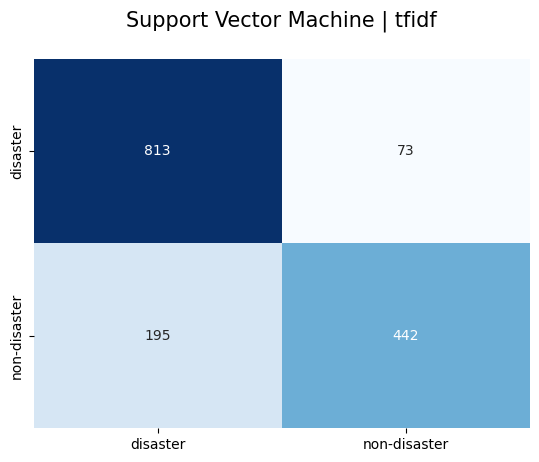

In [104]:
sns.heatmap(cm3_2, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Support Vector Machine | tfidf\n', fontsize=15);

## Model Comparison

In [105]:
# Create df for accuracy scores

In [106]:
model = ['random forest', 'Decision Tree', 'Support Vector Machine']
data = [[acs1_1,acs1_2],[acs2_1,acs2_2],[acs3_1,acs3_2]]

In [107]:
acs_all = pd.DataFrame(data,model, columns=['bag of word','tf-idf'])

In [108]:
acs_all

,bag of word,tf-idf
random forest,0.798424,0.801707
Decision Tree,0.768221,0.750492
Support Vector Machine,0.815496,0.824032


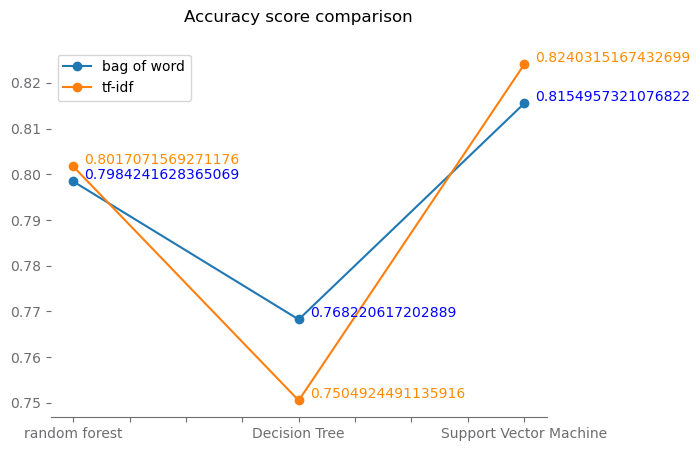

In [109]:
# Plot a line plot for accuracy scores
acs_all.plot(marker='o')
plt.title('Accuracy score comparison\n')
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

for x, y in zip([0,1,2], acs_all['bag of word']):
    plt.text(x+.05, y, f'{y}', ha='left', va='bottom', color='blue')
for x, y in zip([0,1,2], acs_all['tf-idf']):
    plt.text(x+.05, y, f'{y}', ha='left', va='bottom', color='darkorange')


##  Model Demonstration

In [110]:
# Example of Tweets
trytext1 = ['deed reason earthquake may allah forgive flood fire']
trytext2 = ['oh god, my hands hurt so much like a fire']
# Transform data
boq_try = tfidf.transform(trytext1)
boq_try2 = tfidf.transform(trytext2)

In [111]:
# Apply best ML model
print(f'this tweet classified as : {model2_2.predict(boq_try)}')

this tweet classified as : [1]


In [112]:
# Apply best ML model
print(f'this tweet classified as : {model2_2.predict(boq_try2)}')

this tweet classified as : [0]
